In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read in the globalsystem2 results as csv, with `dtype=np.float32` in order to aid with loading in

In [ ]:
df = pd.read_csv('../../../FYP/data/testglobalsystem2_res_NOAA_10yr.csv', dtype=np.float32)

In [ ]:
print(df.shape)

In [7]:
df = pd.read_csv('../../data/openmodelica/NOAA_10yr_reduced.csv', dtype=np.float32)
print(df.shape)

(576210, 9)


In [38]:
df_new = df.drop_duplicates(subset='time')
print(df_new.shape)

(246832, 9)


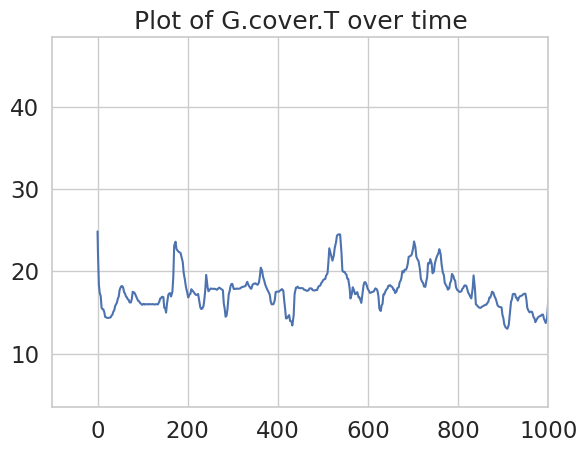

In [43]:
plt.plot(df_new['G.air.T'] - 273.15)
plt.xlim([-100,1000])
plt.title('Plot of G.cover.T over time')
plt.show()#plt.savefig('../imgs/abnormalities.png')

In [44]:
cols_to_keep = []
for col in df_new.columns:
    if df_new[col].nunique() > 1:
        cols_to_keep.append(col)

In [45]:
df_new.to_csv('../../data/openmodelica/NOAA_res_dropped.csv')

In [46]:
df_new = pd.read_csv('../../data/openmodelica/NOAA_res_dropped.csv', usecols=cols_to_keep)

In [13]:
df_new = df_new.drop(columns='Unnamed: 0')
print(df_new.shape)
print(df_new.head())

(246832, 8)
        time    G.air.T  G.air_Top.T  G.canopy.T  G.cover.T  G.E_el_tot  \
0    0.00000  298.00000    298.00000   298.00000  298.00000    0.000000   
1   60.00000  295.24213    295.33582   298.59976  293.97205   23.333334   
2  240.00000  291.48456    291.54642   293.77307  287.52335   93.333336   
3  300.00000  290.48090    290.53775   292.42026  286.11417  116.666664   
4  321.90564  290.15840    290.21106   291.97970  285.65250  125.185530   

   G.E_th_tot   G.sky.T  
0     0.00000 -1.400000  
1    53.20273 -1.420000  
2   215.06686 -1.480000  
3   268.99246 -1.500000  
4   288.65414 -1.507302  


drop initial hours due to abnormalities during initialisation

In [25]:
df_new = df_new.iloc[2:]

In [26]:
print(df_new.isna().sum().sort_values())
df_new = df_new.drop(columns=['HP.h_ex_ev','HP.Exhaust_ev.h_outflow'])

time                                       0
TES.Summary.T_profile.Twf[9]               0
TES.Summary.T_profile.Twf[10]              0
TES.Summary.T_profile.Twf[11]              0
TES.Summary.T_profile.Twf[12]              0
                                       ...  
TES.flow1Dim.Cells[8].InFlow.m_flow        0
TES.cell1DimInc_hx[13].qdot_hx             0
controller.T2.condition                    0
HP.h_ex_ev                             96692
HP.Exhaust_ev.h_outflow                96692
Length: 2939, dtype: int64


In [12]:
print(df_new.isna().sum().sum())

0


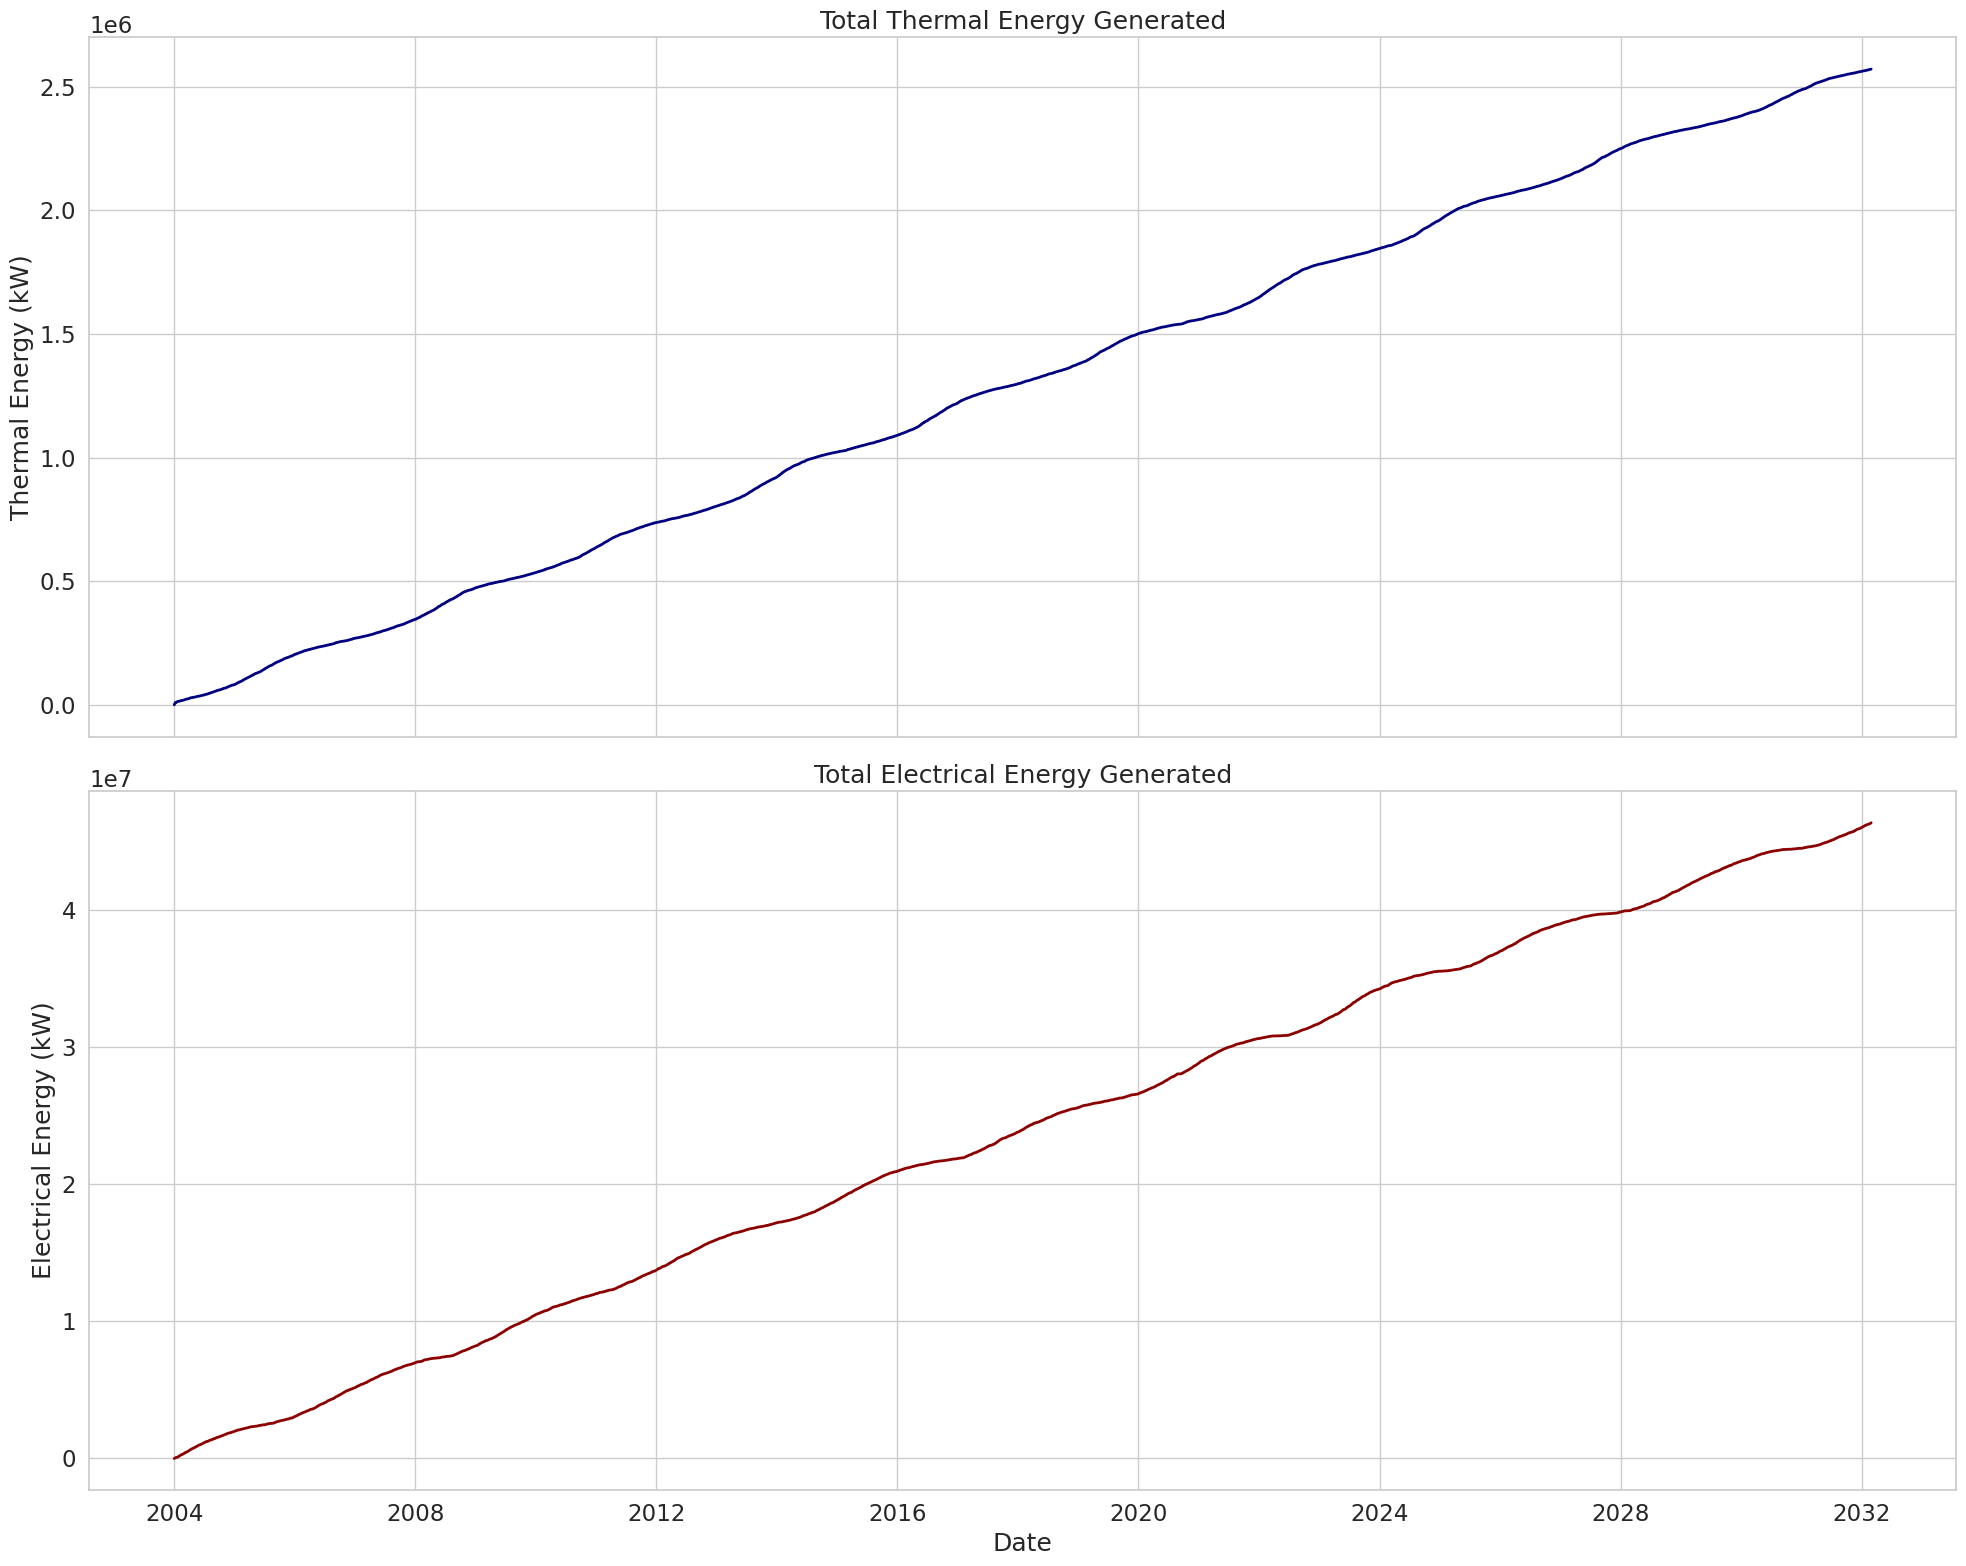

In [14]:
df_copy = df_new.copy()

df_copy.index = pd.date_range(start='2004-01-01', periods=len(df_new), freq='H')
sns.set(style="whitegrid", font_scale=1.5)

fig, ax = plt.subplots(2, figsize=(20, 16), sharex=True)

sns.lineplot(data=df_copy['G.E_th_tot'], ax=ax[0], color="navy", linewidth=2)
ax[0].set_title('Total Thermal Energy Generated')
ax[0].set_ylabel('Thermal Energy (kW)')

sns.lineplot(data=df_copy['G.E_el_tot'], ax=ax[1], color="darkred", linewidth=2)
ax[1].set_title('Total Electrical Energy Generated')
ax[1].set_ylabel('Electrical Energy (kW)')

plt.xlabel('Date')

plt.tight_layout() 
plt.show()#savefig('../../imgs/openmodelica/OM_enegy_cumsum.pdf', format='pdf', transparent=True)

In [15]:
import re

#pattern = '^(?!.*TYM)(?!.*der)(?!.*SC)(?!.*\[).*$' #match columns without [, ..., in name
pattern = '^(?!.*TYM)(?!.*der)(?!.*\[).*$' #match columns without reference to derivative, tomato yield model (TYM) or [

matched_columns = [col for col in df_new.columns if re.match(pattern,col)]
print(len(matched_columns))
for col in matched_columns:
    print(col)

8
time
G.air.T
G.air_Top.T
G.canopy.T
G.cover.T
G.E_el_tot
G.E_th_tot
G.sky.T


In [16]:
for column in matched_columns:
    col_type = df_new[column].dtype
    unique_values = df_new[column].nunique()
    
    if unique_values > 3:
        print(f"{column} : CONTINUOUS")
    else:
        print(f"{column} : DISCRETE")

time : CONTINUOUS
G.air.T : CONTINUOUS
G.air_Top.T : CONTINUOUS
G.canopy.T : CONTINUOUS
G.cover.T : CONTINUOUS
G.E_el_tot : CONTINUOUS
G.E_th_tot : CONTINUOUS
G.sky.T : CONTINUOUS


In [21]:
df_new = pd.read_csv('../../data/openmodelica/NOAA_res_dropped.csv', usecols=matched_columns, index_col='time')
print(df_new)

                G.air.T  G.air_Top.T  G.canopy.T  G.cover.T    G.E_el_tot  \
time                                                                        
0.000000e+00  298.00000    298.00000   298.00000  298.00000  0.000000e+00   
6.000000e+01  295.24213    295.33582   298.59976  293.97205  2.333333e+01   
2.400000e+02  291.48456    291.54642   293.77307  287.52335  9.333334e+01   
3.000000e+02  290.48090    290.53775   292.42026  286.11417  1.166667e+02   
3.219056e+02  290.15840    290.21106   291.97970  285.65250  1.251855e+02   
...                 ...          ...         ...        ...           ...   
3.153528e+08  290.78280    290.76785   289.90845  283.90270  4.633314e+07   
3.153546e+08  290.77634    290.76285   289.89758  283.90390  4.633384e+07   
3.153564e+08  290.79288    290.78122   289.91254  283.93213  4.633454e+07   
3.153582e+08  290.76514    290.75366   289.89120  283.91794  4.633524e+07   
3.153600e+08  290.72600    290.71450   289.85474  283.88806  4.633594e+07   

Since energy, both electrical and thermal, are calculated as cumulative totals, we can differentiate in order to get instantaneous energy consumption values

In [22]:
df_copy = df_new.copy()
df_copy['G.E_el_I'] = df_new['G.E_el_tot'].diff()
df_copy['G.E_th_I'] = df_new['G.E_th_tot'].diff()

df_copy['G.E_el_I'].fillna(df_new['G.E_el_tot'].iloc[0], inplace=True)
df_copy['G.E_th_I'].fillna(df_new['G.E_th_tot'].iloc[0], inplace=True)



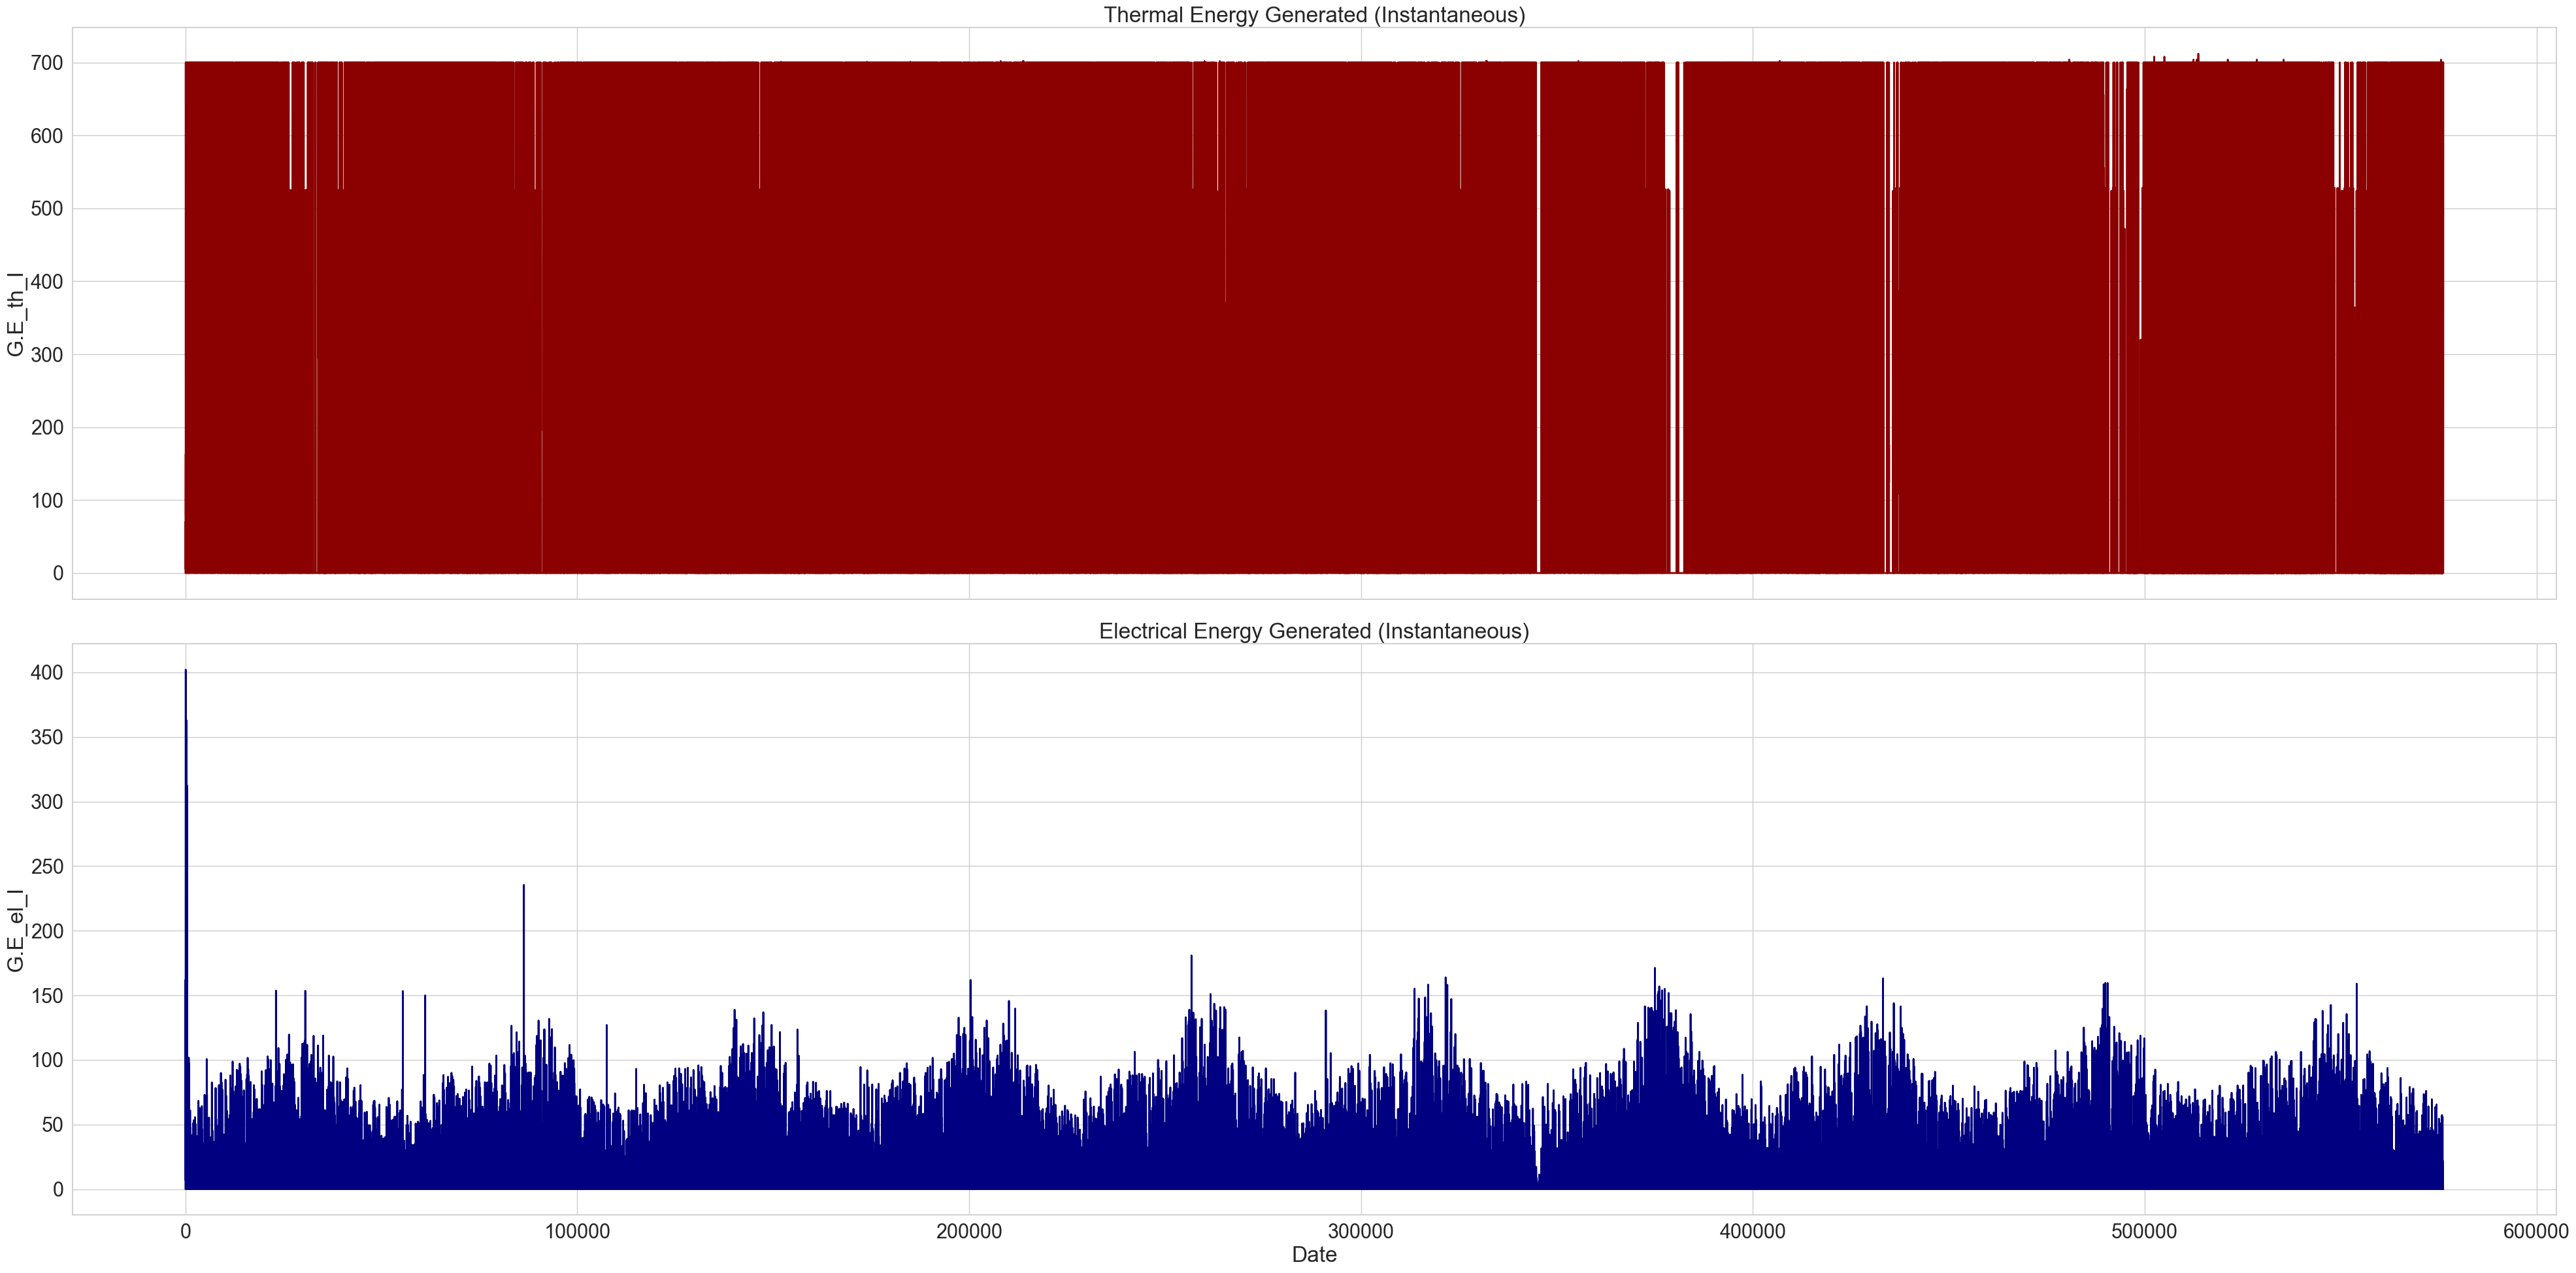

In [56]:
dates = pd.date_range(start='2004-01-01', periods=len(df_new), freq='H') 
df_new.index = dates

sns.set(style="whitegrid", font_scale=2)

fig, ax = plt.subplots(2, 1, figsize=(40, 20), sharex=True)

sns.lineplot(data=df_copy['G.E_th_I'], ax=ax[1], color="navy", linewidth=2)
ax[0].set_title('Thermal Energy Generated (Instantaneous)')
ax[0].set_ylabel('G.E_th_I')

sns.lineplot(data=df_copy['G.E_el_I'], ax=ax[0], color="darkred", linewidth=2)
ax[1].set_title('Electrical Energy Generated (Instantaneous)')
ax[1].set_ylabel('G.E_el_I')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

700.0 130.61690000011413


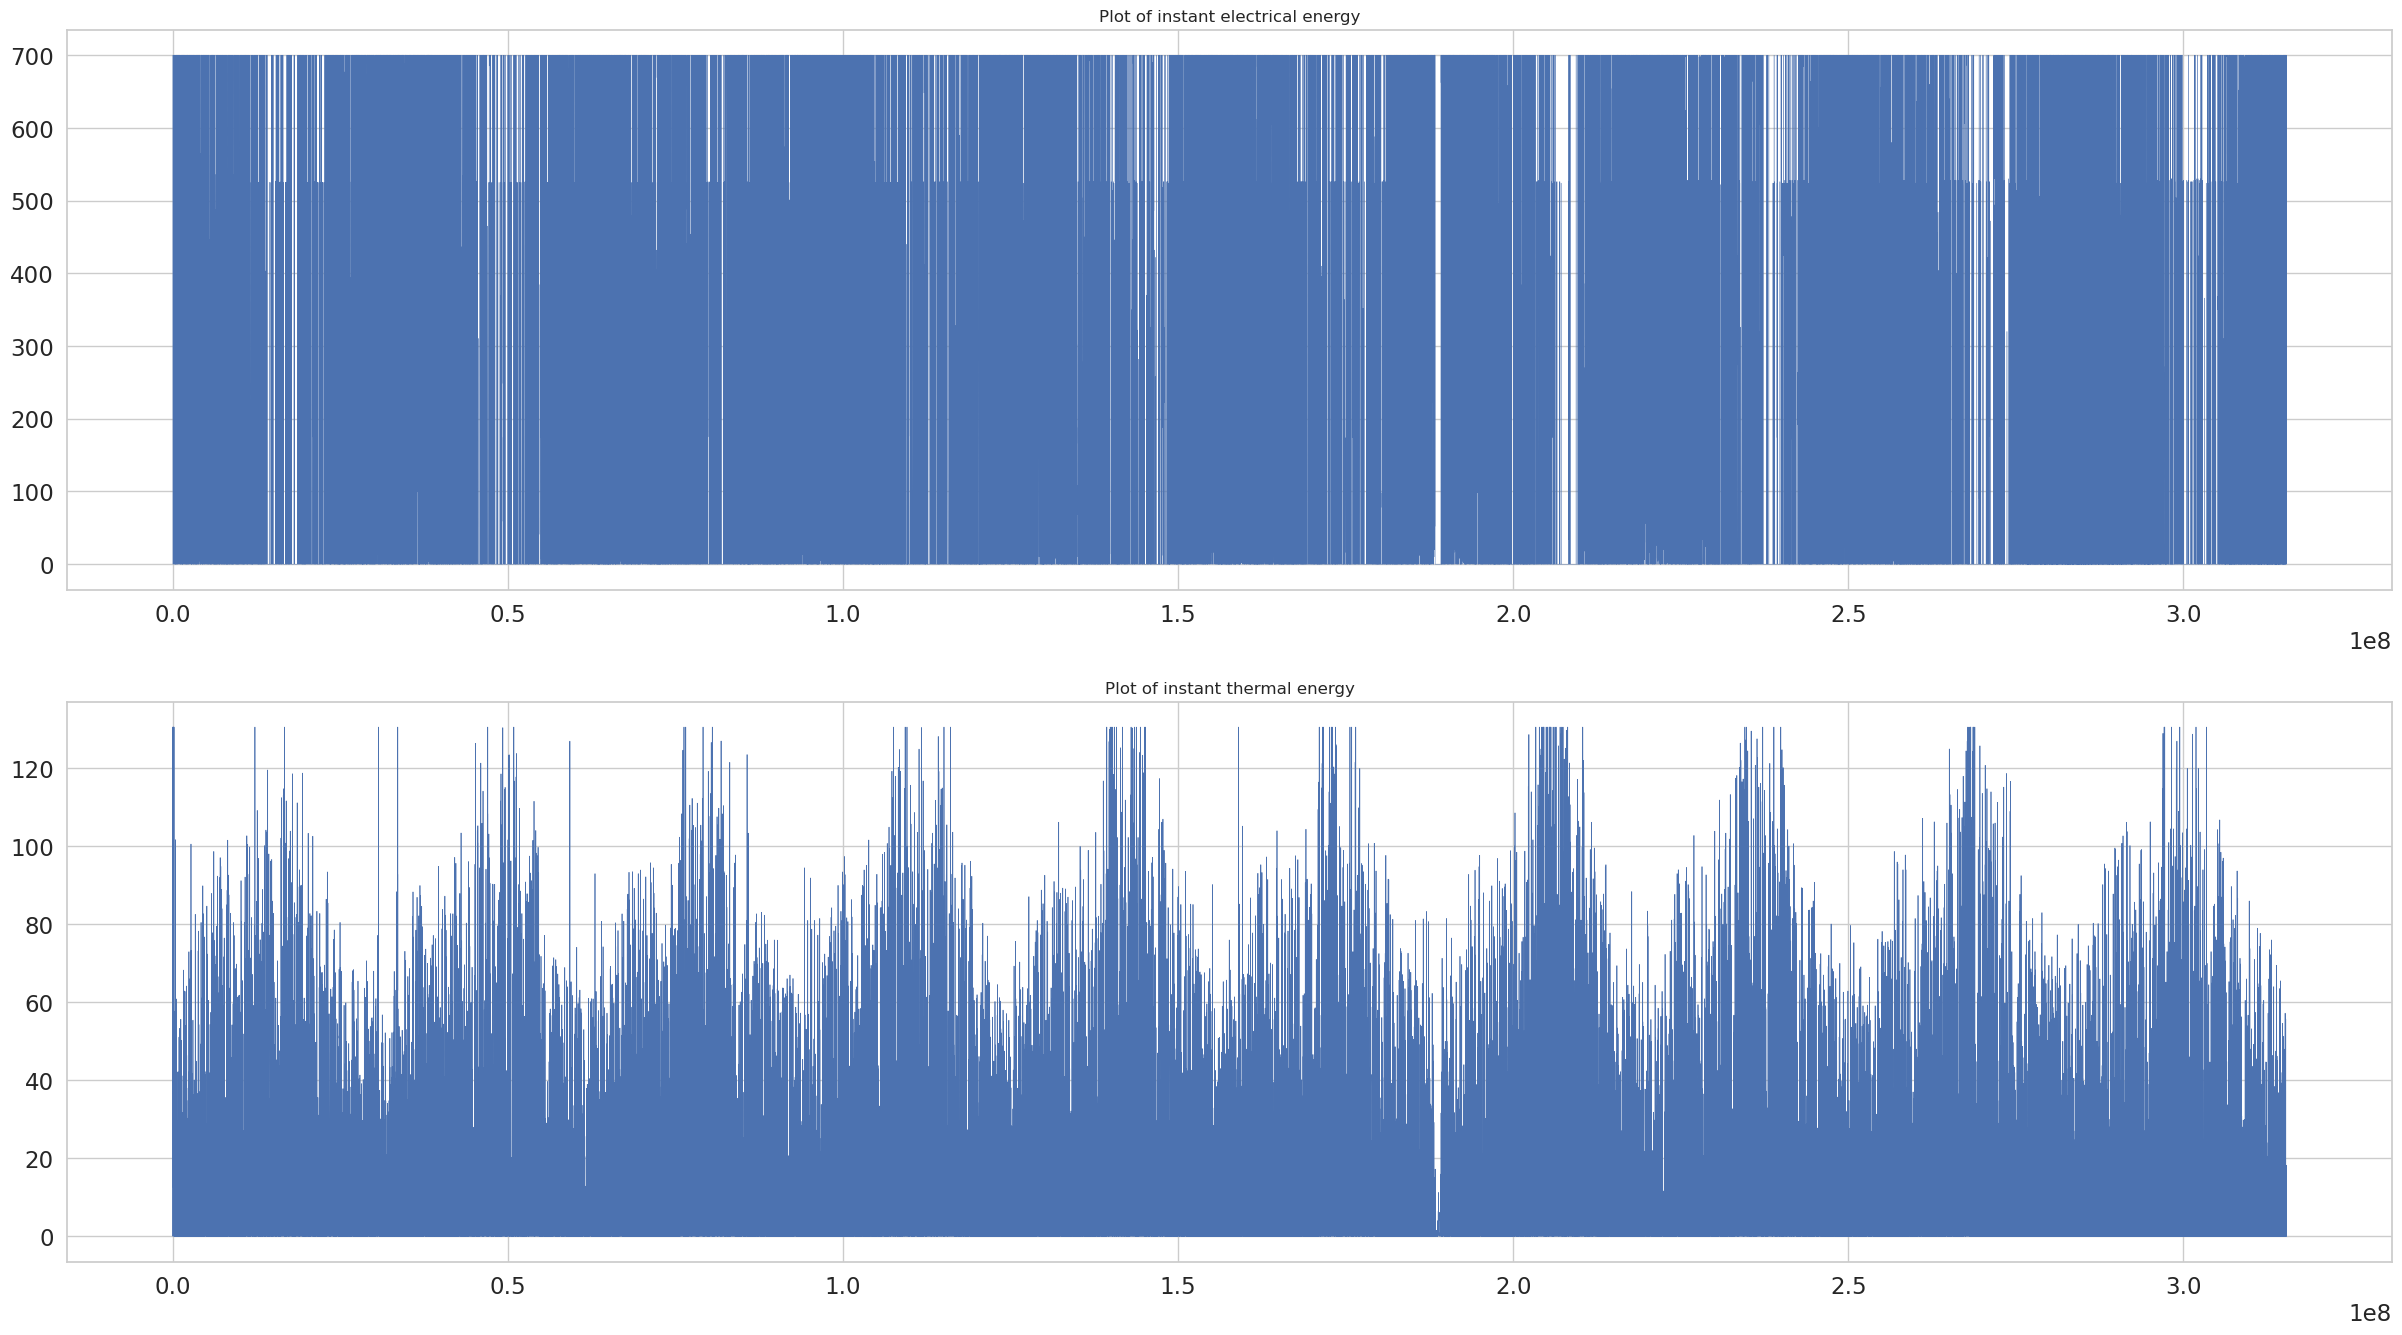

In [23]:
el_thrsh, th_thrsh = df_copy['G.E_el_I'].quantile(0.99), df_copy['G.E_th_I'].quantile(0.9995)

df_copy['G.E_el_I'] = df_copy['G.E_el_I'].apply(lambda x: min(x, el_thrsh))
df_copy['G.E_th_I'] = df_copy['G.E_th_I'].apply(lambda x: min(x, th_thrsh))
print(el_thrsh, th_thrsh)

fig, ax = plt.subplots(2, figsize=(30,16))
ax[0].plot(df_copy['G.E_el_I'], linewidth=0.25)
ax[1].plot(df_copy['G.E_th_I'], linewidth=0.5)

ax[0].set_title('Plot of instant electrical energy', fontsize=12)
ax[1].set_title('Plot of instant thermal energy', fontsize=12)

#ax[0].set_xlim([0, 0.5e8])
#ax[1].set_xlim([0, 0.5e8])

plt.show()#plt.savefig('../../imgs/openmodelica/OM_energy_instant.pdf', format='pdf', transparent=True)

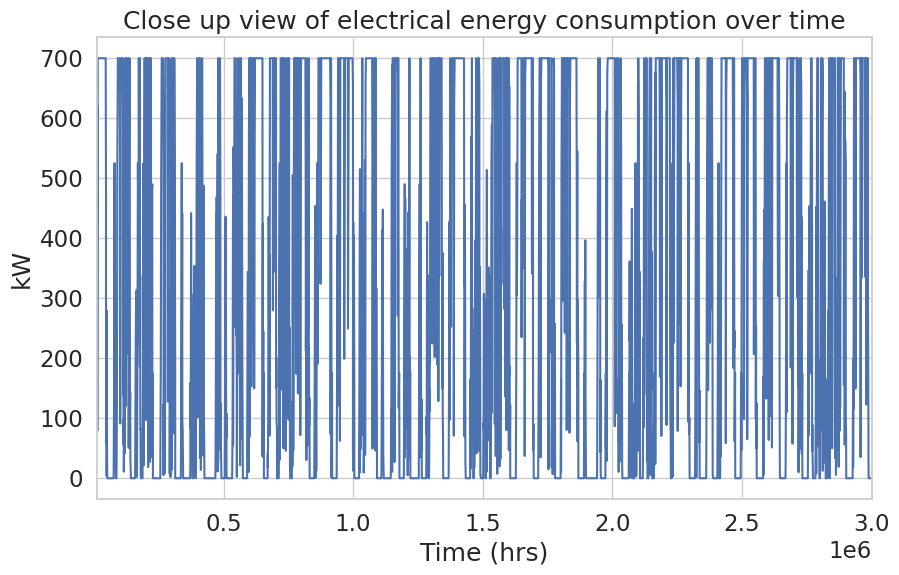

In [30]:
plt.figure(figsize=(10,6))
plt.plot(df_copy['G.E_el_I'])
plt.xlim([1e4, 3e6])
plt.ylabel('kW')
plt.xlabel('Time (hrs)')
plt.title('Close up view of electrical energy consumption over time')
plt.show()#savefig('../../imgs/openmodelica/OM_energy_closeup.pdf', format='pdf', transparent=True)

In [33]:
df_copy = df_copy[df_copy.index % 3600 == 0]#
print(df_copy)

               G.air.T  G.air_Top.T  G.canopy.T  G.cover.T  G.E_el_tot  \
time                                                                     
0.0          298.00000    298.00000   298.00000  298.00000         0.0   
3600.0       289.38095    289.37060   288.48047  280.60540      1400.0   
7200.0       290.66170    290.64713   289.49980  281.73990      2800.0   
10800.0      289.92340    289.90256   288.91970  280.96143      4200.0   
14400.0      289.32755    289.30988   288.37195  280.57822      5600.0   
...                ...          ...         ...        ...         ...   
315345600.0  290.80630    290.78564   290.01727  283.97626  46330336.0   
315349200.0  290.84430    290.82750   289.95605  283.97720  46331736.0   
315352800.0  290.78280    290.76785   289.90845  283.90270  46333136.0   
315356400.0  290.79288    290.78122   289.91254  283.93213  46334536.0   
315360000.0  290.72600    290.71450   289.85474  283.88806  46335936.0   

               G.E_th_tot  G.sky.T  G

In [36]:
df_copy.to_csv('../../data/openmodelica/NOAA_res_reduced.csv')

In [47]:
df_new = pd.read_csv('../../data/openmodelica/NOAA_res_reduced.csv', index_col='time')

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns, index=df_copy.index)

In [49]:
print(df_std)

              G.air.T  G.air_Top.T  G.canopy.T  G.cover.T  G.E_el_tot  \
time                                                                    
0.0          0.471951     0.472372    0.413257   0.605054    0.000000   
3600.0       0.260857     0.261056    0.210265   0.227873    0.000030   
7200.0       0.292224     0.292316    0.232001   0.252474    0.000060   
10800.0      0.274142     0.274083    0.219631   0.235594    0.000091   
14400.0      0.259549     0.259569    0.207951   0.227284    0.000121   
...               ...          ...         ...        ...         ...   
315345600.0  0.295766     0.295707    0.243035   0.300966    0.999879   
315349200.0  0.296697     0.296732    0.241730   0.300987    0.999909   
315352800.0  0.295190     0.295272    0.240715   0.299371    0.999940   
315356400.0  0.295437     0.295599    0.240802   0.300010    0.999970   
315360000.0  0.293799     0.293965    0.239570   0.299054    1.000000   

             G.E_th_tot   G.sky.T  G.E_el_I  G.E_t

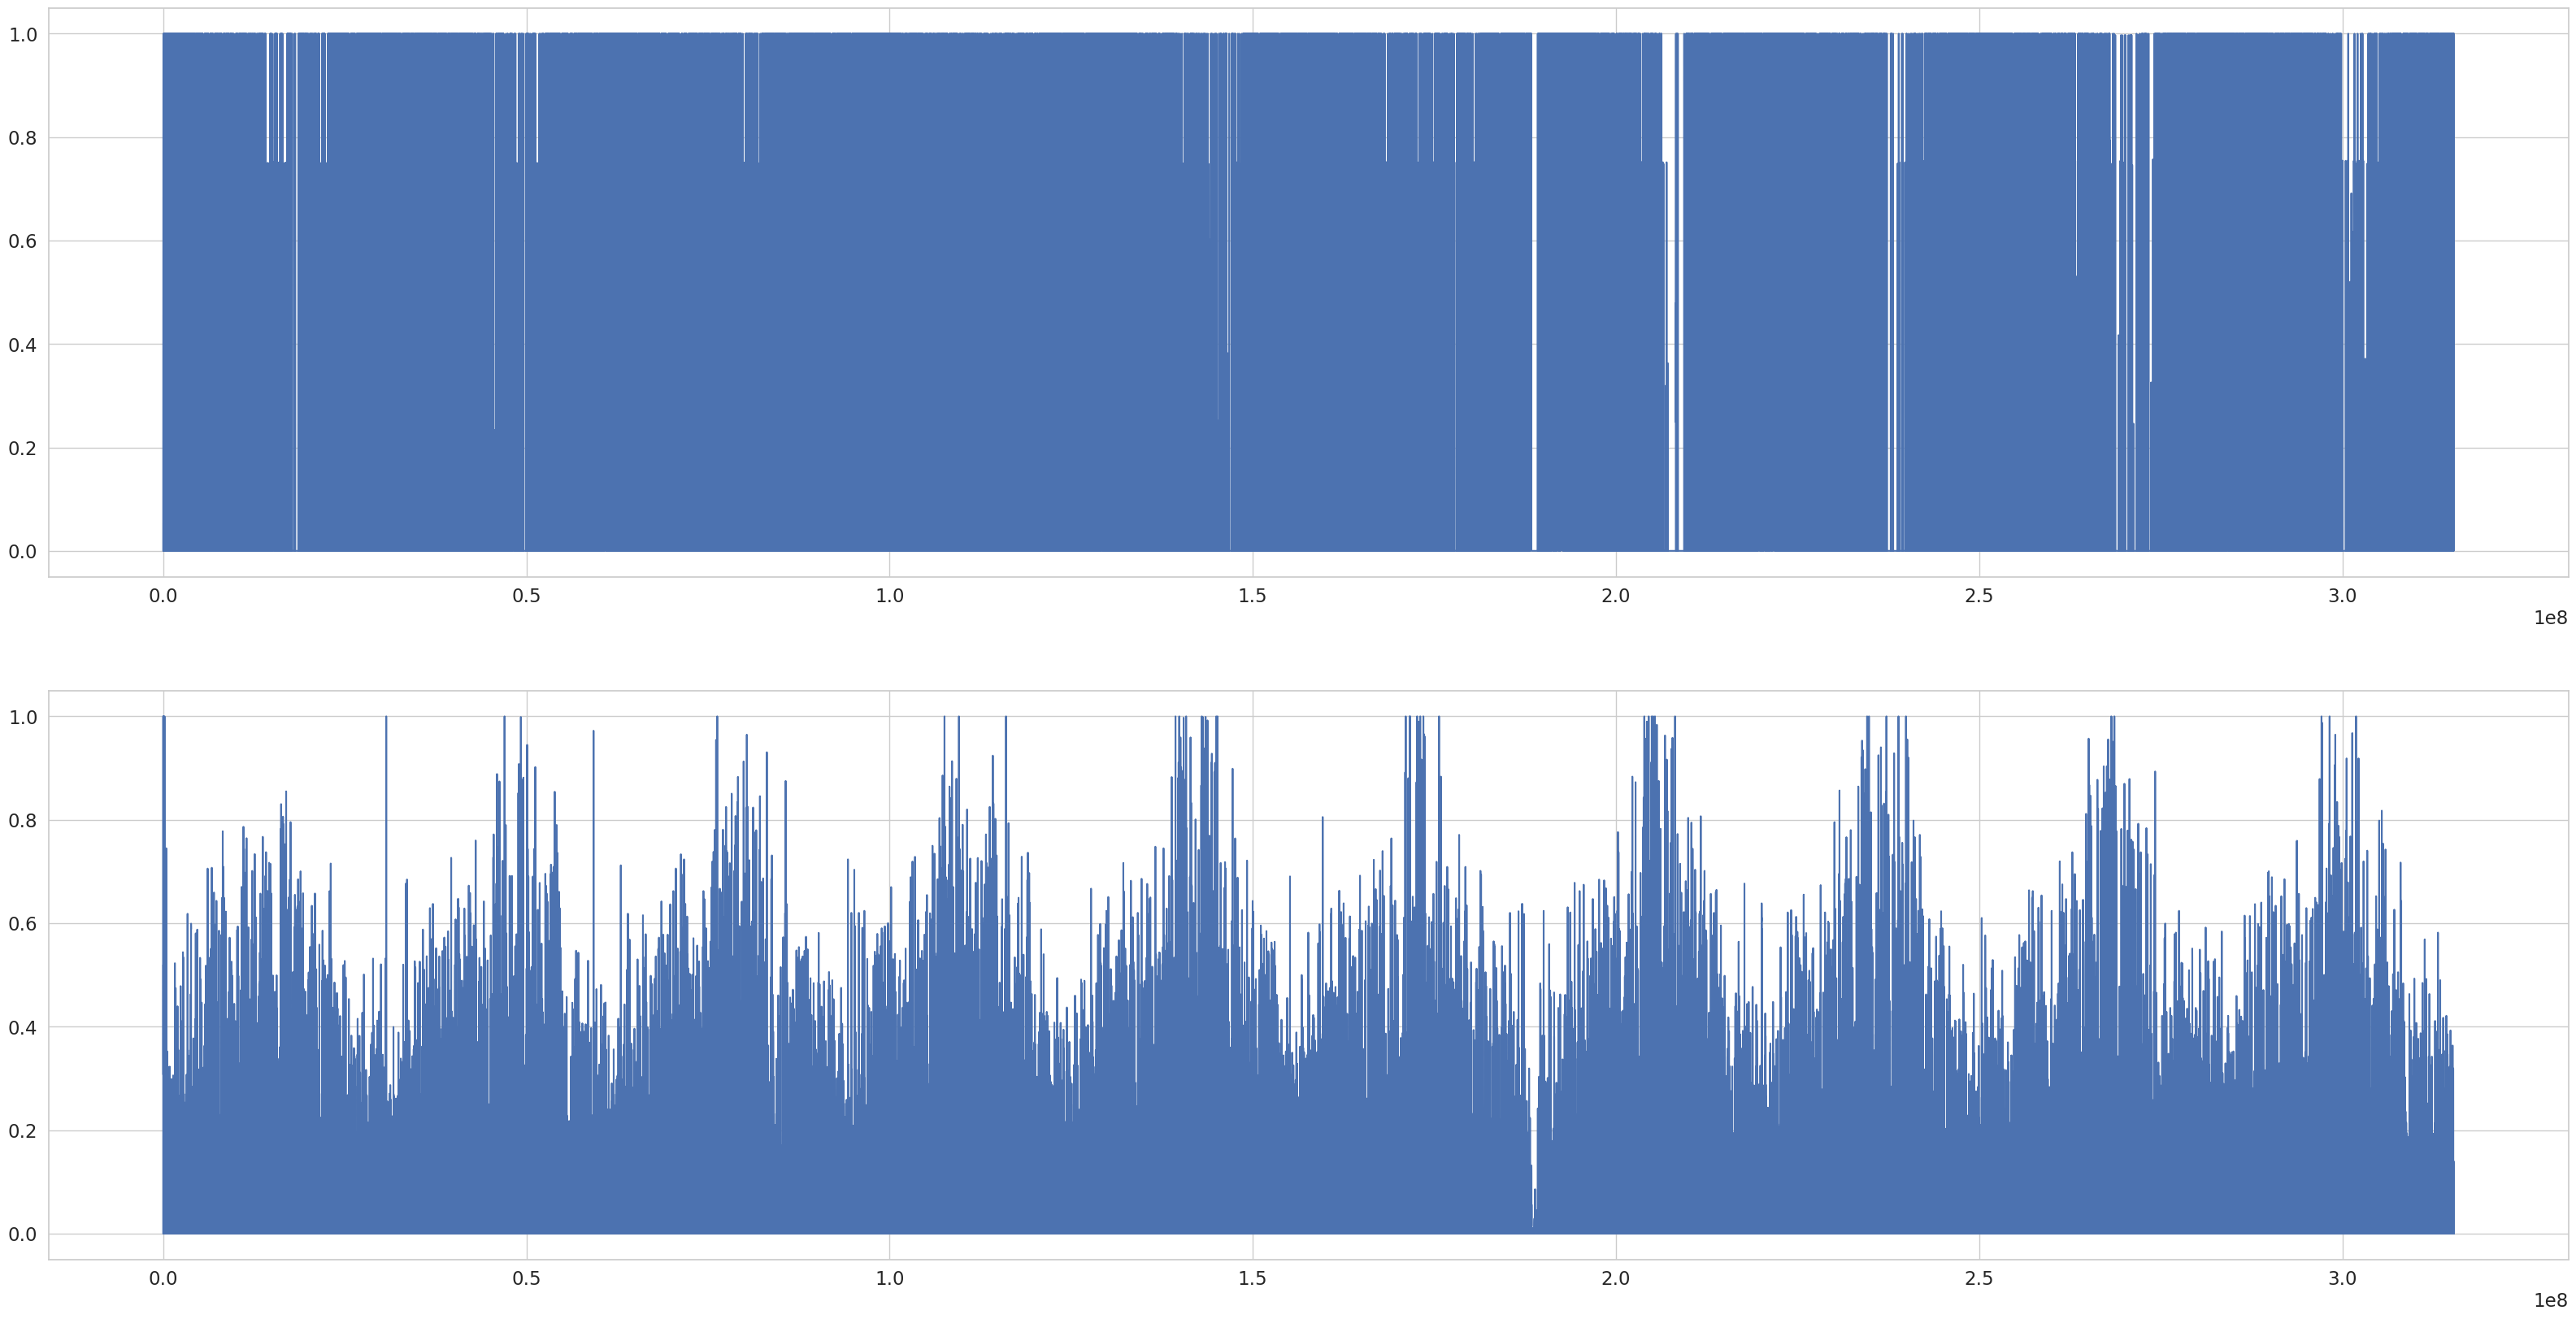

In [50]:
fig, ax = plt.subplots(2, figsize=(40,20))
ax[0].plot(df_std['G.E_el_I'])
ax[1].plot(df_std['G.E_th_I'])

#ax[0].set_xlim(0, 1_000)
#ax[1].set_xlim(0, 1_000)

plt.show()

In [51]:
df_std.to_csv('../../data/openmodelica/NOAA_res_std.csv')

In [52]:
df_std = pd.read_csv('../../data/openmodelica/NOAA_res_std.csv', index_col='time')

In [53]:
for col in df_std.columns:
    if 'CO2' in col:
        print(col)

In [11]:
print(df_std['G.E_el_I'].corr(df_std['G.CO2_air.CO2']))
print(df_std['G.E_th_I'].corr(df_std['G.CO2_air.CO2']))

0.05697796564991577

In [12]:
for col in df_std.columns:
    if '.T' in col:
        print(col)

G.air.T
G.air_Top.T
G.canopy.T
G.cover.T
G.floor.T
CHP.T_water_ex_CHP
CHP.fluid.T
CHP.heatPortConverter.thermalPortL.T
G.MV_CanAir.T_m
G.Q_cd_Soil.TC_cc.dT
G.Q_cd_Soil.TC_ss.Q_flow
G.Q_cd_Soil.TC_ss.dT
G.Q_ven_AirOut.NaturalVentilationRate.T_mean
G.Q_ven_TopOut.NaturalVentilationRate.T_b
G.Q_ven_TopOut.NaturalVentilationRate.T_mean
G.T_ex_1ry.T
G.T_ex_2ry.T
G.T_su_1ry.T
G.Tout_Kelvin.y
G.U_vents.T_air_sp
G.U_vents.Tair_setpoint1.y
G.sky.port.T
HP.T_ex_cd
HP.T_su_ev
HP.fluid.T
HP.heatPortConverter.thermalPortL.T
TES.Wall_ext.T
T_ex_CHP.T
T_ex_G.T
T_ex_TES.T
T_su_CHP.T
T_su_G.T
T_su_HP.T
G.SC.T2c.localCondition
G.SC.T3c.localCondition
G.SC.T4.localCondition
G.SC.T5.localCondition
G.SC.T8b.localCondition
G.SC.T9.localCondition
controller.T1.localCondition
controller.T2.localCondition
CHP.T_ex_CHP.T
CHP.T_ex_CHP.port.p
CHP.Tc
CHP.fluid.Wall_int.T
CHP.fluid.fluidState.T
CHP.heatPortConverter.heatPort.T
CHP.prescribedHeatFlow.port.T
G.MV_CanAir.T_can
G.Q_cd_Soil.TC_cc.Q_flow
G.Q_cd_Soil.TC_c

In [14]:
print(df_std['G.E_el_I'].corr(df_std['CHP.Tc']))
print(df_std['G.E_th_I'].corr(df_std['CHP.Tc']))

-0.11590987853859046
-0.0942844205775002


In [58]:
import pandas as pd
df_std = pd.read_csv('../../data/openmodelica/NOAA_res_std.csv').set_index('time')
print(df_std)

              G.air.T  G.air_Top.T  G.canopy.T  G.cover.T  G.E_el_tot  \
time                                                                    
0.0          0.471951     0.472372    0.413257   0.605054    0.000000   
3600.0       0.260857     0.261056    0.210265   0.227873    0.000030   
7200.0       0.292224     0.292316    0.232001   0.252474    0.000060   
10800.0      0.274142     0.274083    0.219631   0.235594    0.000091   
14400.0      0.259549     0.259569    0.207951   0.227284    0.000121   
...               ...          ...         ...        ...         ...   
315345600.0  0.295766     0.295707    0.243035   0.300966    0.999879   
315349200.0  0.296697     0.296732    0.241730   0.300987    0.999909   
315352800.0  0.295190     0.295272    0.240715   0.299371    0.999940   
315356400.0  0.295437     0.295599    0.240802   0.300010    0.999970   
315360000.0  0.293799     0.293965    0.239570   0.299054    1.000000   

             G.E_th_tot   G.sky.T  G.E_el_I  G.E_t

/tmp/ipykernel_3838/3060918361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['G.E_tot_I'] = (data['G.E_el_I'] + data['G.E_th_I'])


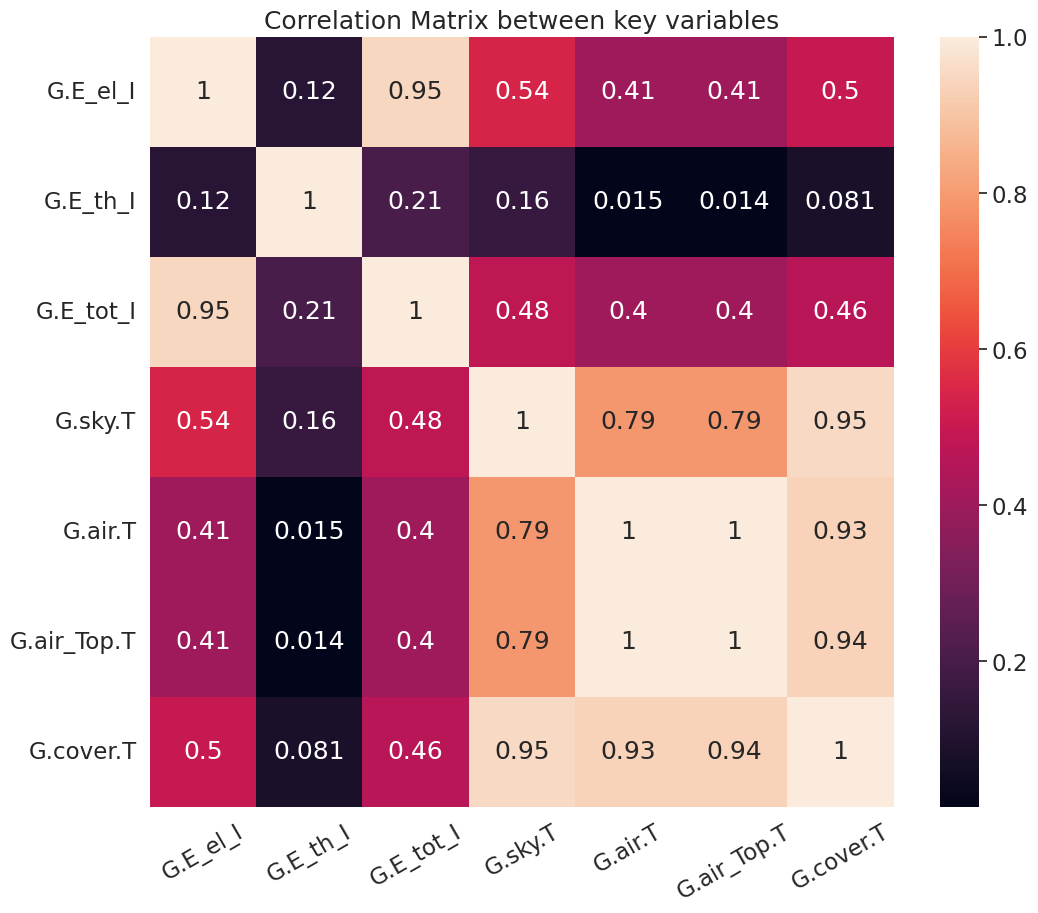

In [75]:
import seaborn as sns
columns = ['G.E_el_I', 'G.E_th_I', 'G.E_tot_I', 'G.sky.T', 'G.air.T', 'G.air_Top.T', 'G.cover.T']
data = df_std[['G.E_el_I', 'G.E_th_I', 'G.sky.T', 'G.air.T', 'G.air_Top.T', 'G.cover.T']]
data['G.E_tot_I'] = (data['G.E_el_I'] + data['G.E_th_I'])

data = data[columns]
plt.figure(figsize=(12,10))
correlation_matrix = abs(data.corr())
sns.heatmap(correlation_matrix, annot=True)
#plt.show()
plt.title('Correlation Matrix between key variables')
plt.xticks(rotation=30)
plt.savefig('../../imgs/openmodelica/pearsons_corr.png', transparent=True)

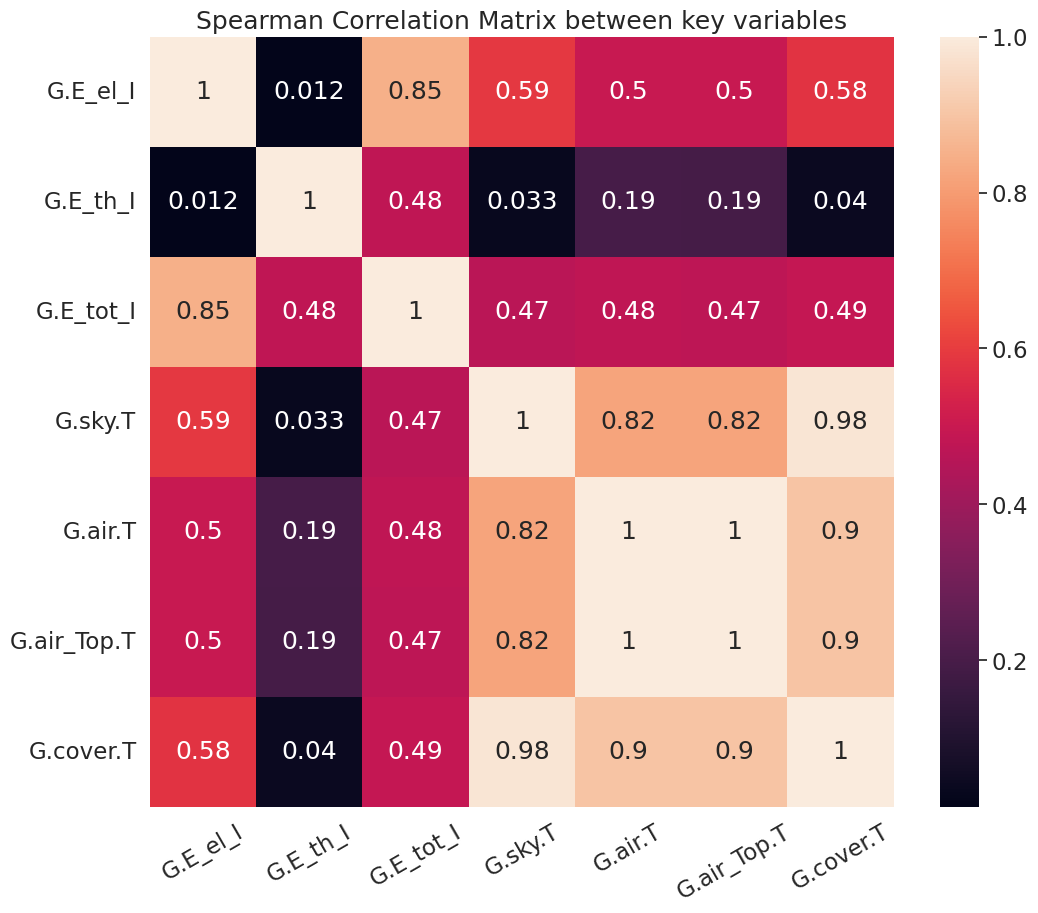

In [76]:
spearman_corr_matrix = abs(data.corr(method='spearman'))

plt.figure(figsize=(12,10))
sns.heatmap(spearman_corr_matrix, annot=True)
plt.title('Spearman Correlation Matrix between key variables')
plt.xticks(rotation=30)
plt.savefig('../../imgs/openmodelica/spearmans_corr.png', transparent=True)

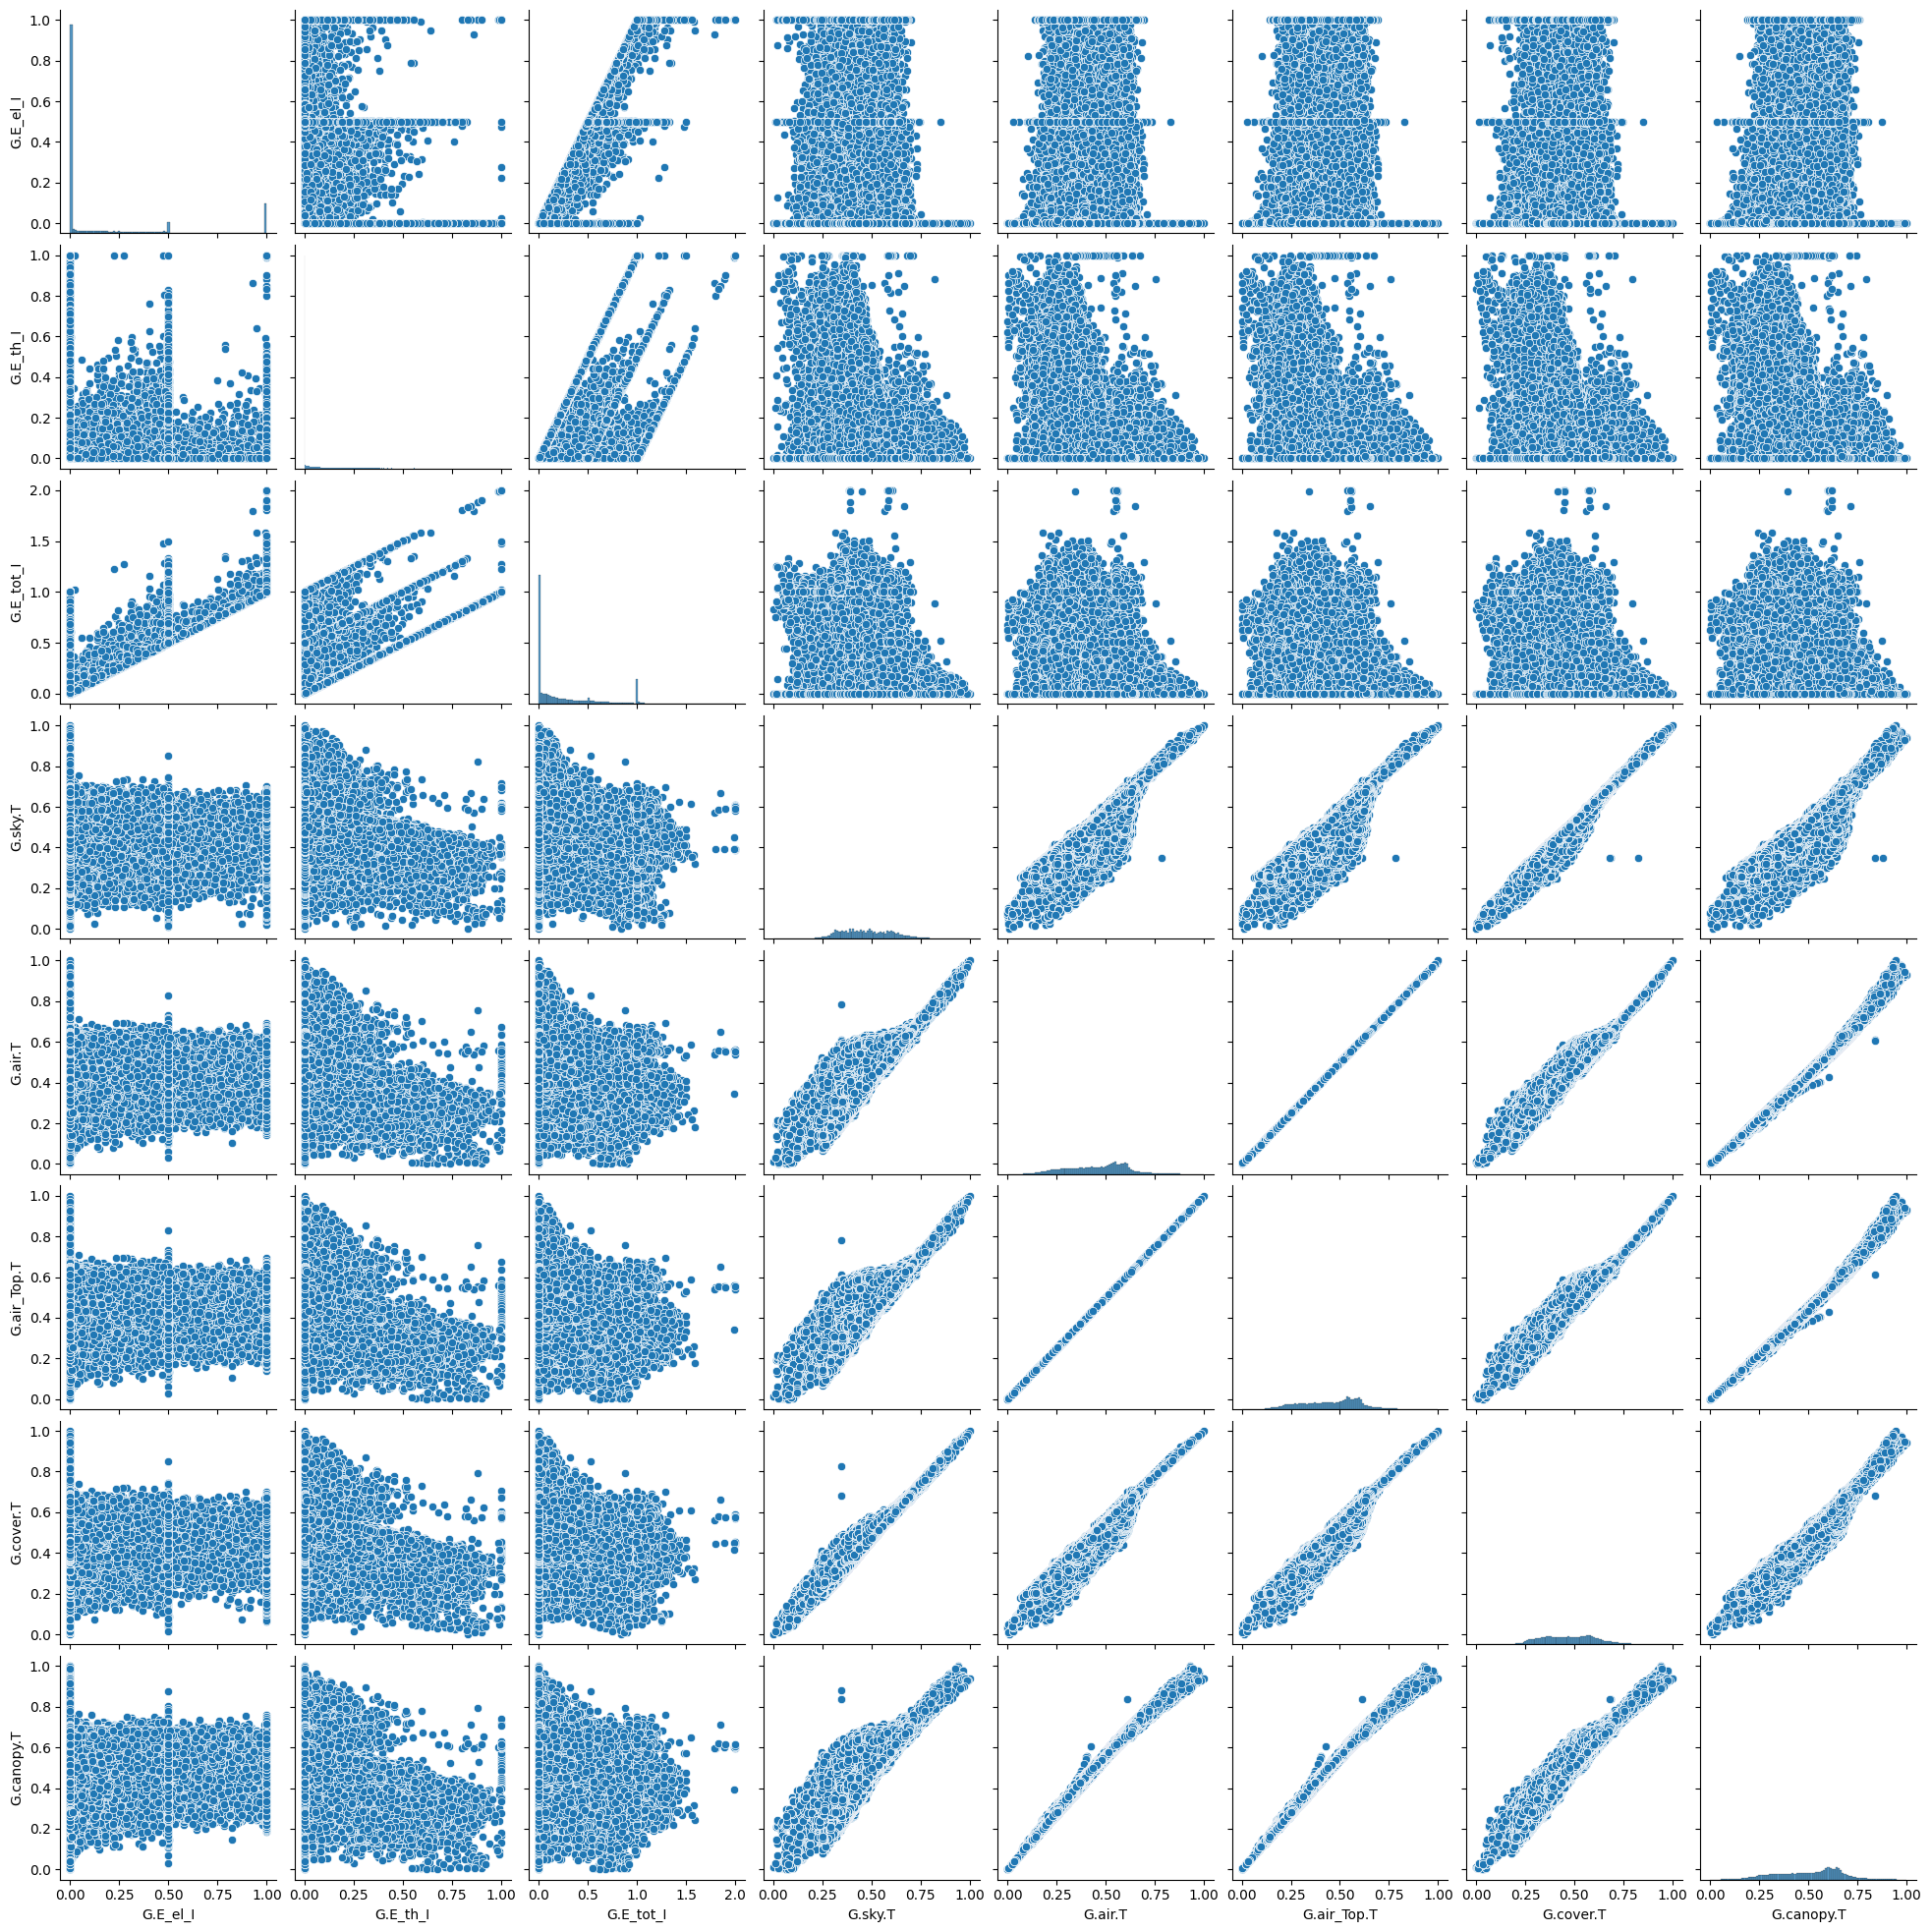

In [59]:
sns.pairplot(data)
plt.show()

In [97]:
data_lag_el, data_lag_th, data_lag_tot = data.copy(), data.copy(), data.copy()

for i in range(28):
    data_lag_el[f'G.E_el_I_lag{i+1}']   = data['G.E_el_I'].shift((i+1)*6)
    data_lag_th[f'G.E_th_I_lag{i+1}']   = data['G.E_th_I'].shift((i+1)*6)
    data_lag_tot[f'G.E_tot_I_lag{i+1}'] = data['G.E_tot_I'].shift((i+1)*6)

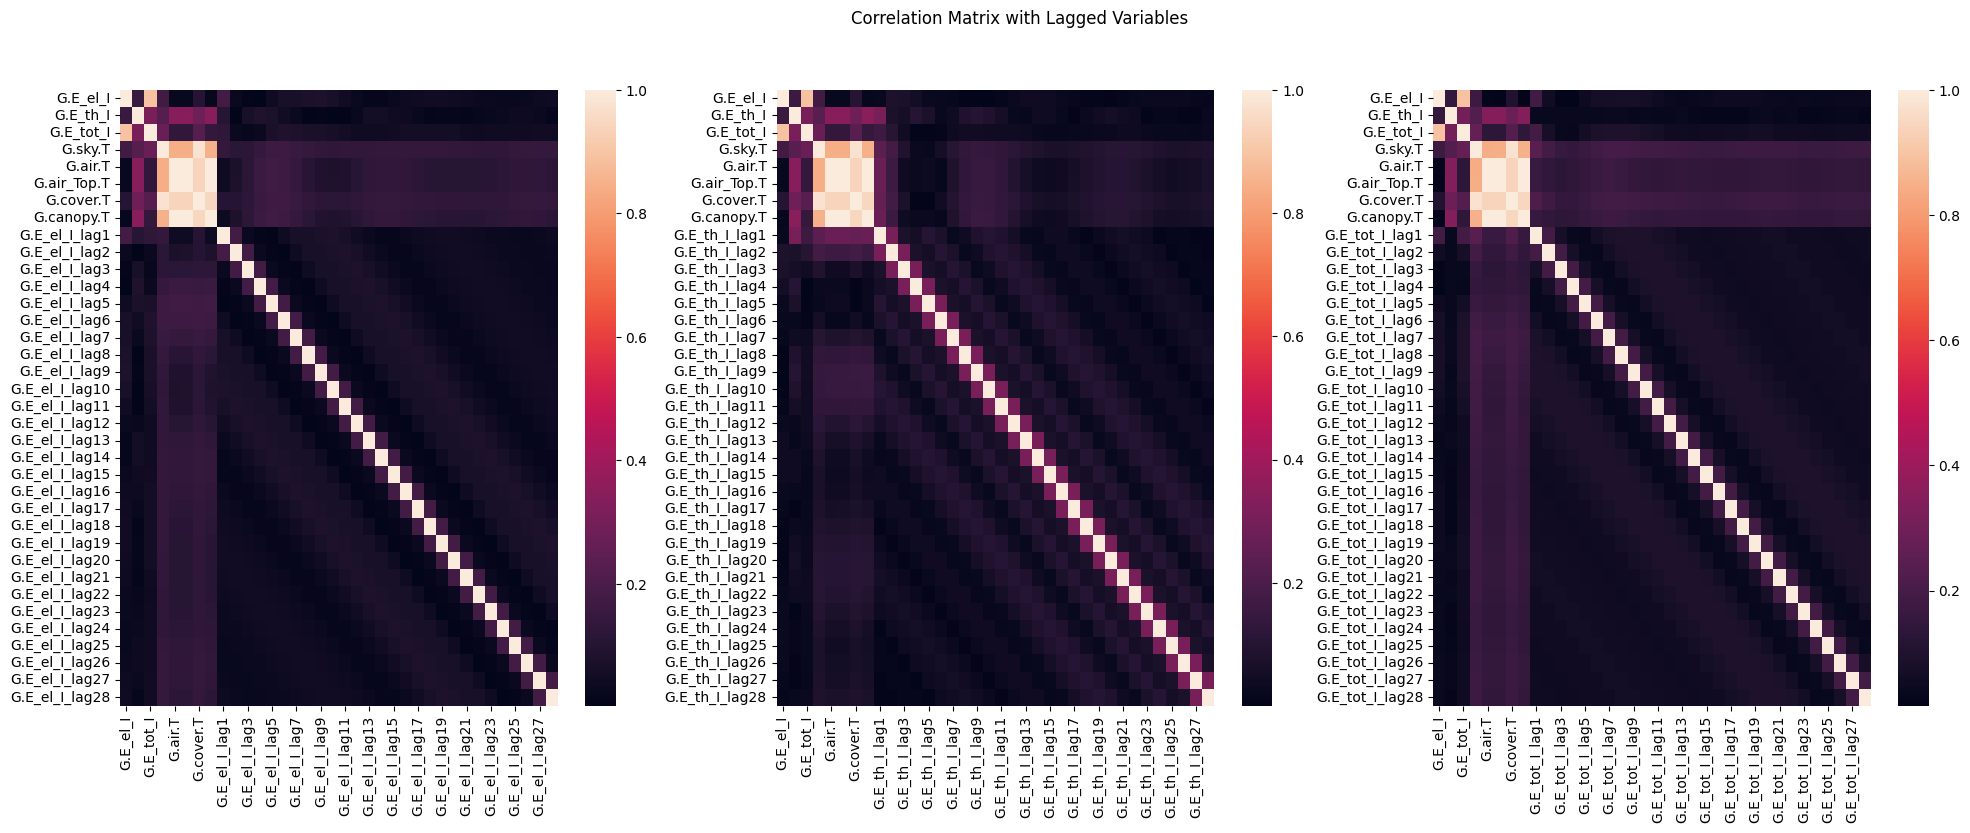

In [99]:
correlation_matrix_lag_el  = abs(data_lag_el.corr())
correlation_matrix_lag_th  = abs(data_lag_th.corr())
correlation_matrix_lag_tot = abs(data_lag_tot.corr())

fig, axes = plt.subplots(1,3, figsize=(24,8))
fig.suptitle('Correlation Matrix with Lagged Variables')

sns.heatmap(correlation_matrix_lag_el,  annot=False, ax=axes[0])
sns.heatmap(correlation_matrix_lag_th,  annot=False, ax=axes[1])
sns.heatmap(correlation_matrix_lag_tot, annot=False, ax=axes[2])
plt.show()

Ways of handling the two response variable:
 - Two separate models
 - One combined response var.
 - Multi-output regression model

In [9]:
data = df_std[['G.air.T', 'G.sky.T', 'G.air_Top.T', 'G.canopy.T', 'G.cover.T']]
pca = PCA(n_components='mle')
reduced_data = pca.fit_transform(data)
print(reduced_data)

[[ 5.79646850e-01  3.10883212e-01  3.88543084e-02  2.52225803e-01]
 [ 3.38929043e-01  2.33970403e-01  1.46988953e-01  1.70553316e-01]
 [ 3.37209831e-01  2.33442311e-01  1.47238773e-01  1.69976260e-01]
 ...
 [ 3.68198232e-01 -5.67090882e-02 -1.30293548e-02  2.04285486e-03]
 [ 3.78453624e-01 -4.88160061e-02 -1.49373100e-02  4.06292995e-04]
 [ 3.91973664e-01 -3.96228752e-02 -1.58955593e-02 -5.50498980e-04]]


In [17]:
import pickle

with open('../data/pca_std_data.pkl', 'wb') as file:
    pickle.dump(df_std, file)

In [45]:
print(df_std['G.E_el_I'].corr(df_std['G.cover.T']))

-0.10205350800554606


In [41]:
high_corr = El_corr[abs(El_corr) > 0.2]

high_corr_sorted = high_corr.abs().sort_values(ascending=False).index

print(len(high_corr))

for name in high_corr_sorted:
    print(name, high_corr[name])

116
G.E_el_I 1.0
G.illu.R_IluFlr_PAR 0.6238774304932955
G.illu.R_FlrCan_PAR 0.6238774291664112
G.illu.R_IluFlr_Glob 0.623877427979763
G.illu.R_IluFlr_NIR 0.6238774273731459
G.illu.R_IluCan_PAR 0.6238774271694059
G.illu.R_NIR 0.6238774262387491
W_residual 0.6238774262012186
G.illu.W_el 0.6238774262012186
W_buy 0.6238774262012186
G.illu.R_IluAir_Glob 0.6238774261997718
G.OnOff.y 0.6238774261757325
G.illu.switch 0.6238774261757325
G.illu.R_PAR 0.6238774261464388
G.illu.R_IluCan_Glob 0.6238774261220155
G.illu.R_IluCan_NIR 0.6238774247251565
G.illu.R_PAR_Can_umol 0.6238774246906473
G.illu.R_PAR_Can 0.6238774242375955
G.air.heatPort.Q_flow -0.6189591304943726
G.air.Q_flow -0.6189591304943726
G.air.P_Air 0.6134958499203462
G.out.port.Q_flow 0.48983032045825853
G.SC.SC_usable 0.45248152275748477
G.MV_CanAir.r_I -0.39891780454463327
G.MV_CanAir.C_5 -0.39862312707376485
G.MV_CanAir.C_3 0.39862312669511213
G.MV_CanAir.S_rs 0.39862312669057026
G.MV_CanAir.C_4 0.3986231265576486
G.MV_CanAir.T_m -0.

(96732, 857) (96732, 846)
Mean Squared Error: 0.00839579411352826
R^2 score: -7.4341465216070315


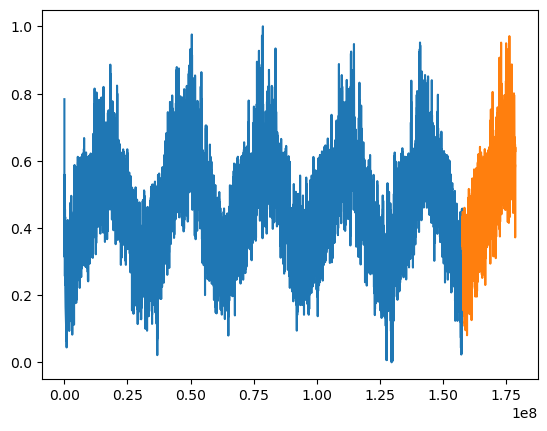

In [176]:
dropped_cols = high_corr.index
X = df_std.drop(dropped_cols, axis=1)
y = df_std['G.E_el_tot']

print(df_std.shape, X.shape)

time_thrsh = 365.25 * 24 * 60 * 60 * 5

train = df_std[df_std.index < time_thrsh]
test = df_std[df_std.index > time_thrsh]

plt.plot(train['G.air.T'])
plt.plot(test['G.air.T'])

model = LinearRegression()
model.fit(train[X.columns], train['G.E_el_tot'])

y_pred = model.predict(test[X.columns])
print(f"Mean Squared Error: {mean_squared_error(test['G.E_el_tot'], y_pred)}")
print(f"R^2 score: {r2_score(test['G.E_el_tot'], y_pred)}")